# Activation Functions

In [1]:
from conx.graphs import plot_f
from conx.activations import *

conx, version 3.3.3
Using TensorFlow backend.


## softmax

In [2]:
softmax([0.1, 0.1, 0.7, 0.0])

[0.21155263483524323,
 0.21155263483524323,
 0.38547399640083313,
 0.19142071902751923]

In [3]:
f = lambda x: softmax([x, .5, .1, 1])

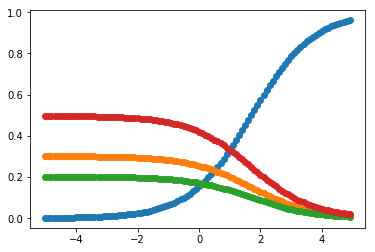

In [4]:
plot_f(f, (-5, 5, .1))

In [5]:
elu(0.5)

0.5

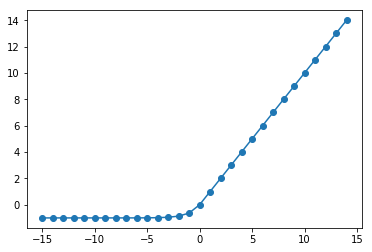

In [6]:
plot_f(elu, (-15, 15, 1))

In [7]:
elu(0.5, .3)

0.5

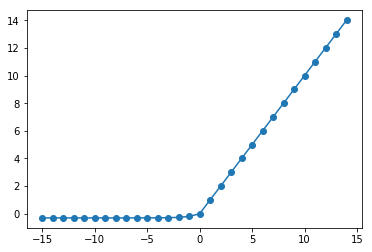

In [8]:
plot_f(lambda x: elu(x, .3), (-15, 15, 1))

In [9]:
selu(0.5)

0.5253505110740662

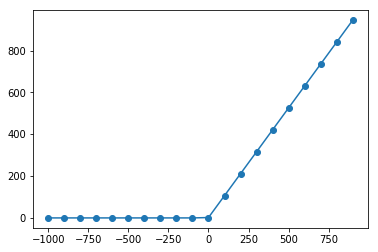

In [10]:
plot_f(selu, (-1000, 1000, 100))

In [11]:
softplus(0.5)

0.9740769863128662

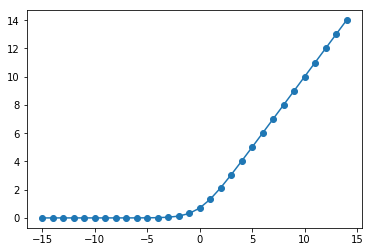

In [12]:
plot_f(softplus, (-15, 15, 1))

In [13]:
softsign(0.5)

0.3333333432674408

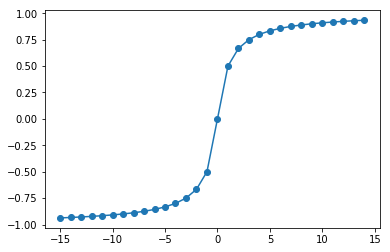

In [14]:
plot_f(softsign, (-15, 15, 1))

In [15]:
relu(0.5)

0.5

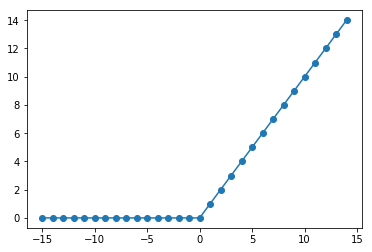

In [16]:
plot_f(relu, (-15, 15, 1))

In [17]:
tanh(0.5)

0.46211716532707214

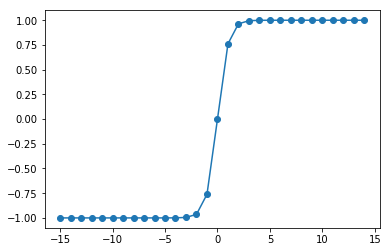

In [18]:
plot_f(tanh, (-15, 15, 1))

In [19]:
sigmoid(0.5)

0.622459352016449

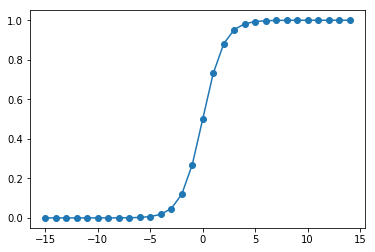

In [20]:
plot_f(sigmoid, (-15, 15, 1))

In [21]:
hard_sigmoid(0.5)

0.6000000238418579

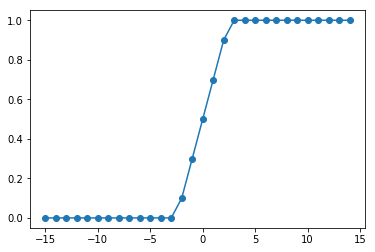

In [22]:
plot_f(hard_sigmoid, (-15, 15, 1))

In [23]:
linear(0.5)

0.5

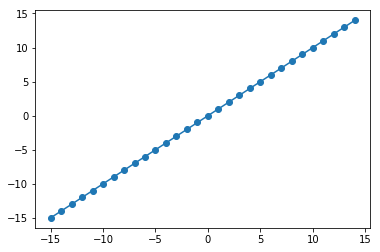

In [24]:
plot_f(linear, (-15, 15, 1))